비정형 데이터(Unstructured Data): 텍스트, 음성, 영상처럼 형태가 구조화되지 않은 데이터

국민청원 답변대상: 20만 이상 득표

In [ ]:
import pandas as pd
from pandas.api.types import CategoricalDtype # 그래프의 값을 정렬해서 보기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'mjkimcs'
os.environ['KAGGLE_KEY'] = '7d10c5f08a131943194c8cd3e4aa633f'

In [ ]:
!kaggle datasets download -d mjkimcs/petition
!unzip '*.zip'

 97% 168M/173M [00:04<00:00, 39.0MB/s]
100% 173M/173M [00:05<00:00, 35.9MB/s]
Archive:  petition.zip
  inflating: petition.csv            


In [ ]:
petitions = pd.read_csv('petition.csv', index_col=0, parse_dates=['start', 'end'], error_bad_lines=False)
petitions

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...


In [ ]:
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [ ]:
petitions.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [ ]:
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [ ]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377756 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377756 non-null  datetime64[ns]
 1   end       377756 non-null  datetime64[ns]
 2   answered  377756 non-null  int64         
 3   votes     377756 non-null  int64         
 4   category  377756 non-null  object        
 5   title     377756 non-null  object        
 6   content   377755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [ ]:
petitions.describe()

,answered,votes
count,377756.000000,3.777560e+05
mean,0.000077,1.514069e+02
std,0.008761,4.842551e+03
min,0.000000,0.000000e+00
25%,0.000000,1.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


In [ ]:
petitions['votes'].max()

1192049

In [ ]:
petitions['votes'].min()

0

In [ ]:
petitions['votes'].mean()

151.40693463505542

In [ ]:
petitions.describe(include=[np.object])
#도배글이 많다고 판단됨

,category,title,content
count,377756,377756,377755
unique,17,330206,358060
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,59020,3018,597


In [ ]:
petitions.isna().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

In [ ]:
petitions['answer'] = petitions['votes'] > 200000
petitions

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False
...,...,...,...,...,...,...,...,...
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...,False
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...,False
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...,False


In [ ]:
petitions.shape

(377756, 8)

In [ ]:
petitions['answer'].value_counts()

False    377679
True         77
Name: answer, dtype: int64

In [ ]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
13577,2017-09-12,2017-09-19,0,20,육아/교육,사립유치원의 집단휴업을 반대합니다,국공립 유치원도 없고 국공립어린이집 들어가기도 힘든 실정에 사립유치원은 부모들의 어...,False,7 days
4213,2017-09-05,2017-09-12,0,1,인권/성평등,청소년 보호법이 아니라 소년법입니다...,소년법 폐지 청원합니다,False,7 days
4214,2017-09-05,2017-09-12,0,0,정치개혁,소년법 강화,이번 부산여중생 사건을보고 느낍니다.\n소년법 폐지해주셨으면 좋겠습니다.\n아님 강...,False,7 days


In [ ]:
petitions['duration'].value_counts()

30 days    366556
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: duration, dtype: int64

In [ ]:
petitions.loc[ (petitions['duration'] == '90 days') & (petitions['answer'] == True) ]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


In [ ]:
petitions_60_answer = petitions.loc[ (petitions['duration'] == '60 days') & (petitions['answer'] == True) ]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(1, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


In [ ]:
petitions_30_answer = petitions.loc[ (petitions['duration'] == '30 days') & (petitions['answer'] == True) ]
print(petitions_30_answer.shape)
petitions_30_answer.head()

(75, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days
49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,True,30 days


In [ ]:
petitions_7_answer = petitions.loc[ (petitions['duration'] == '7 days') & (petitions['answer'] == True) ]
print(petitions_7_answer.shape)
petitions_7_answer.head()

(0, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,


In [ ]:
petitions_7 = petitions.loc[(petitions['duration'] == '7 days')]
print(petitions_7.shape)

(2436, 9)


In [ ]:
petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count

,index,start
0,2017-09-05,942
1,2017-09-06,335
2,2017-09-04,331
3,2017-09-07,129
4,2017-09-08,94
5,2017-09-03,53
6,2017-09-01,52
7,2017-09-09,43
8,2017-09-12,41
9,2017-08-30,40


In [ ]:
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True) #정렬

#국민청원 초창기(2017년 8월 19일~9월 14일)에는 duration이 7일 이었던 것으로 추정됨

,start,count
25,2017-08-19,9
22,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
21,2017-08-24,18
19,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


In [ ]:
categories = petitions['category'].value_counts().reset_index()
categories.columns = ['category', 'counts']
categories

#정치개혁과 관련된 국민청원이 가장 많다는 것을 알 수 있음

,category,counts
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738
3,안전/환경,29196
4,교통/건축/국토,26910
5,외교/통일/국방,25705
6,육아/교육,24861
7,보건복지,23608
8,일자리,22111
9,행정,19373


In [ ]:
petitions_category1_answer = petitions.loc[ (petitions['category'] == '정치개혁') & (petitions['answer'] == True) ]
print(petitions_category1_answer.shape)
petitions_category1_answer.head()

#정치개혁과 관련된 국민청원이 가장 많지만, 도배글이 많았다고 판단됨

(7, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
96427,2018-01-15,2018-02-14,1,277674,정치개혁,국회의원 급여를 최저시급으로 책정해 주세요,최저시급 인상 반대하던 의원들부터 최저시급으로 책정해주시고 최저시급으로 일하는 노동...,True,30 days
165796,2018-03-13,2018-04-12,0,304320,정치개혁,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,True,30 days
201953,2018-04-16,2018-05-16,0,260624,정치개혁,선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.,이미 청와대가 선관위에 질의사항으로 접수한\n김기식 금융감독원장의 정치자금법 위반 ...,True,30 days
397558,2018-10-04,2018-11-03,1,275806,정치개혁,최**과 이하 비슷한 리벤지포르노 범들 강력징역해주세요.,리벤지포르노 징역이라고 네이버에 치면\n제일 먼저 뜨는 기사가 뭔줄 아십니까?\n“...,True,30 days
418376,2018-10-24,2018-11-23,0,211546,정치개혁,소년법 개정을 촉구 합니다! 17살 조카가 자살을 했습니다,https://pann.nate.com/talk/343936115\n저는 지난 8월...,True,30 days


In [ ]:
petitions_category2_answer = petitions.loc[ (petitions['category'] == '기타') & (petitions['answer'] == True) ]
print(petitions_category2_answer.shape)
petitions_category2_answer.head()

(7, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
164255,2018-03-12,2018-04-11,0,216886,기타,GMO완전표시제 시행을 촉구합니다!,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,True,30 days
199778,2018-04-15,2018-05-15,0,216163,기타,어른들에게 성적 학대와 조롱을 당하고 있는 아이들을 구해주세요.,"4월 1일 새벽 2시 경, 구글 서칭 중 불법 야동 사이트(https://y****...",True,30 days
219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생...",True,30 days
242950,2018-05-25,2018-06-24,0,224539,기타,문재인 대통령님께 청원합니다.,"문재인 대통령님\n헌법개정안 실패, 풍계리 폭파, 북미정상회담 중지 등 오늘 하루만...",True,30 days


In [ ]:
petitions_category3_answer = petitions.loc[ (petitions['category'] == '인권/성평등') & (petitions['answer'] == True) ]
print(petitions_category3_answer.shape)
petitions_category3_answer.head()

(23, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,True,30 days
81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,True,30 days
148806,2018-02-23,2018-03-25,1,242687,인권/성평등,조두순 사건의 피해자 가족을 우롱하는 윤서인을 처벌해주십시오,'윤서인'이라는 만화가가 조두순 사건을 인용하여 정치상황을 풍자하는 만화를 그렸는데...,True,30 days


In [ ]:
start_df = petitions['start'].value_counts().reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print( '집계: {}일'.format(start_df.shape[0]) )
start_df.head()

집계: 509일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [ ]:
pd.pivot_table?

In [ ]:
categories_pivot = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
categories_pivot

,answer,answered,votes
category,,,
경제민주화,2,1,1720766
교통/건축/국토,3,2,2834727
기타,7,1,4720310
농산어촌,0,0,114822
문화/예술/체육/언론,7,4,4086382
미래,1,1,1120174
반려동물,4,0,2023905
보건복지,3,2,4269399
성장동력,2,2,866240


In [ ]:
categories_pivot_de = categories_pivot.sort_values(by='answer', ascending=False)
categories_pivot_de

,answer,answered,votes
category,,,
인권/성평등,23,9,12225998
안전/환경,10,2,6512799
기타,7,1,4720310
정치개혁,7,2,5686172
문화/예술/체육/언론,7,4,4086382
반려동물,4,0,2023905
외교/통일/국방,4,1,3637926
육아/교육,3,1,4420589
보건복지,3,2,4269399


In [ ]:
start_pivot = pd.pivot_table(petitions, index=['start'], aggfunc=np.sum)
start_pivot_de = start_pivot.sort_values(by='votes', ascending=False)
start_pivot_de.loc[start_pivot_de['votes']>350000]

,answer,answered,votes
start,,,
2018-10-17,1,0,1300523
2018-10-31,2,0,827096
2018-06-13,1,0,786157
2018-10-18,2,0,721524
2018-02-19,1,1,701520
2018-11-09,2,0,672819
2018-07-22,1,0,672491
2017-09-06,1,1,648209
2018-06-24,2,0,628925


In [ ]:
start_pivot_de = start_pivot_de.reset_index()
start_pivot_de.head()

,start,answer,answered,votes
0,2018-10-17,1,0,1300523
1,2018-10-31,2,0,827096
2,2018-06-13,1,0,786157
3,2018-10-18,2,0,721524
4,2018-02-19,1,1,701520


In [ ]:
start_df

,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487
...,...,...
504,2017-08-26,74
505,2017-08-22,69
506,2017-08-27,49
507,2017-08-19,39


In [ ]:
hottest_day_df = start_df.merge(start_pivot_de, on='start', how='left')
hottest_day_df.sort_values('votes', ascending=False)[:5]

,start,counts,answer,answered,votes
113,2018-10-17,926,1,0,1300523
80,2018-10-31,1010,2,0,827096
365,2018-06-13,542,1,0,786157
74,2018-10-18,1032,2,0,721524
258,2018-02-19,698,1,1,701520


In [ ]:
answer_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answer_df.shape[0]))

답변 대상 청원: 77건


In [ ]:
answer_df.sort_values('votes', ascending=False).head(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days


In [ ]:
!pip install soynlp
!pip show soynlp

     |████████████████████████████████| 419kB 11.1MB/s 
Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: scikit-learn, psutil, numpy, scipy
Required-by: 


In [ ]:
import re #정규표현식

In [ ]:
petitions = pd.read_csv('petition.csv', index_col=0, parse_dates=['start', 'end'], error_bad_lines=False)
petitions

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...


In [ ]:
p = r'.*(주식|공매도).*'
stock = petitions[ petitions['title'].str.match(p) | petitions['content'].str.match(p,flags=re.MULTILINE) ]
stock.shape

(8088, 7)

In [ ]:
stock.sort_values('votes', ascending=False)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
187633,2018-04-06,2018-05-06,0,242286,경제민주화,삼성증권 시스템 규제와 공매도 금지,우리사주 280만주에 배당 주당 1000원 하기로 하고 현금배당 28억원이 나가야될...
76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...
193553,2018-04-10,2018-05-10,0,110641,경제민주화,김기식 금감원장님을 무슨일이 있어도 지켜주세요!!,최근에 터진 삼성증권 사태 및 금융적폐를 뿌리뽑을 수 있는 유일한 분입니다.\n하지...
394401,2018-10-01,2018-10-31,0,102846,경제민주화,국민연금의 주식대차를 폐지하라,국민연금의 주식대여는 조속히 금지되어야 합니다!\n새 정부의 국정운영이 벌써 2년을...
353707,2018-08-24,2018-09-23,0,50137,경제민주화,국민연금 주식대여 금지 국민청원,문재인 대통령님!\n지금 주식시장에서 개인투자자들의 울부짖음이 들리지 않으십니까?\...
...,...,...,...,...,...,...,...
84580,2018-01-11,2018-02-10,0,0,경제민주화,가상화폐 허가할땐 언제고 이제와서 이딴식으로 ?,대한민국은 공산주의국가인가요?\n그럴거면 상위층 부를 공평하게 재배치해주세요.\n태...
84565,2018-01-11,2018-02-10,0,0,경제민주화,가상화폐 폐지 반대 좀 더 신중한 접근 필요 법무장관 사과 요구,"가상화폐를 도박, 불법으로 볼 법안 제도화 되어 있지 않은 현 시점에 보다 신중하게..."
84554,2018-01-11,2018-02-10,0,0,미래,가상화폐 거래소 폐지 반대! 반대! 반대!,국민들이 웁니다... 도와주십쇼\n국민들이 피땀흘려 번돈 입니다\n국민들을 멍청하다...


In [ ]:
stock.tail(3)

,start,end,answered,votes,category,title,content
article_id,,,,,,,
491539,2019-01-09,2019-02-08,0,22,경제민주화,공매도 폐지 금융위원장 경질,아니 도대체 공매도 관련해서 청원이 얼마나 많이 올라 오는데 듣는 시늉도 안합니까 ...
491885,2019-01-09,2019-02-08,0,5,정치개혁,국민연금폐지 하지않으면삶이피폐해진다,35년이 지나면 월급의 30%정도를. 국민연금보험료로 내야합니다.\n계산해보세요\n...
491918,2019-01-09,2019-02-08,0,23,경제민주화,문정부 공매도폐지하라,개미들 돈털어가는 역적 문재인 공매도세력\n모두들 한국 증시 살리기위해 공매도 폐지...


In [ ]:
sample_index = 76020

In [ ]:
sample_title = stock.loc[sample_index, 'title']
sample_title

'<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?'

In [ ]:
sample_content = stock['content'][sample_index]
sample_content

'저는 정부에게 묻고 싶습니다.\\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 꾸게 해본적이 있습니까?\\n가상화폐로 피해를 본 사람들이 많다구요?\\n투자라는건 개인이 성공하던 실패하던 개인이 책임을 지는게 맞습니다.\\n무리한 투자로 인해 피해를 보는것은 가상화폐 뿐만이 아니라 주식이든 그 어느 항목에도 해당되는것입니다.\\n그런데 가상화폐를 하는 사람들이 다 피해를 보는것 마냥, 언론을 장악하고 또 다시 선전포고를 합니다.\\n"가상화폐 거래소 조차 폐쇄해 버릴 수 있으니 적당히들 하시라고"\\n우리 국민들은 가상화폐로 인해서 여태껏 대한민국에서 가져보지 못한 행복한 꿈을 꿀 수 있었습니다.\\n내집하나 사기도 힘든 대한민국에서 어쩌면 집을 살 수 있을지도 모른다..\\n어쩌면 내가 하고싶은것을 하면서 살 수 있을지도 모른다..\\n어쩌면 내 생활에 조금 보템이 되어서 숨좀 돌릴 수 있을지 모른다..\\n우리 국민들이 불법 도박을 하나요?\\n국민들은 바보가 아닙니다. 시대의 흐름상 가상화폐는 4차혁명이 맞다고 판단되기에 투자를 하는것이며\\n그냥 마구잡이로 투자하는것이 아닌 주식과 똑같이 가상화폐를 발급하는 회사들을 꼼꼼하게 알아보며,\\n자기가 가진돈의 무리하지 않을 정도에서 현명하게 투자를 합니다.\\n그런데 일부 가상화폐를 불법적으로 사용하는 사람들 떄문에, 큰 돈을 투자해서 잃은 사람들 때문에\\n정상적은 투자자들까지 불법 투기판에 참여한 사람들도 매도하고 있습니다.\\n저는 문재인정부를 뽑을때 드디어 한국에서 사람답게 살 수 있겠구나 가슴이 부풀었습니다.\\n하지만 똑같습니다. 어느하나 나아지는건 없습니다.\\n국민들이 실제로 느끼는 경제적 허탈감은 달라지는게 없습니다.\\n여전히 겨울되면 보일러비 아끼려고 전기장판 틀어야 되고 여름되면 에어콘비 아까워 하면서 살아야 합니다.\\n마지막으로 부탁드리겠습니다.\\n정부 당신들이 바라보는 세상과 우리 국민들이 바라보는 세상은 다릅니다.\\n당신들은 국민을 보호한다고 생각하지만 국민들은 정부가

# 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['<',
 '가상화폐규제반대',
 '>',
 '정부는',
 '국민들에게',
 '단',
 '한번이라도',
 '행복한',
 '꿈을',
 '꾸게',
 '해본적',
 '있습니까',
 '?']

In [ ]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:20]

['저는',
 '정부에게',
 '묻고',
 '싶습니다',
 '.\\',
 'n',
 '정부는',
 '단',
 '한번이라도',
 '우리',
 '국민들에게',
 '행복한',
 '꿈을',
 '꾸게',
 '해본적이',
 '있습니까',
 '?\\',
 'n',
 '가상화폐로',
 '피해를']

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

13
319


In [ ]:
#개행문자 제거
def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    return text

In [ ]:
%time sentences = stock['content'].apply(preprocessing)

CPU times: user 56.6 ms, sys: 2.95 ms, total: 59.5 ms
Wall time: 64.5 ms


In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 10.2 s, sys: 93.3 ms, total: 10.3 s
Wall time: 10.4 s


article_id
28    [**, 존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장...
32    [존경하는, 대통령님께, ,, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되...
77    [※, 지장물관련, 국토부의, 해석, :, 기존, 건축물의, 철거, 공사에, 관한,...
Name: content, dtype: object

In [ ]:
!pip install wordcloud

In [ ]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는', '제가', '그럼', 
                '이런', '저런', '합니다', '많은', '많이', '정말', '너무', 
                '지금', '있는', '하는', '것은', '또한', '그런', '하고', 
                '있습니다', '이렇게', '하는데', '했습니다', '있다', '우리',
                '입니다', '없는', '것입니다', '모든', '이미', '어떤', '어떻게', 
                '있고', '것이', '때문에']

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [ ]:
# 그래프에서 한글표현을 위해 폰트 설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

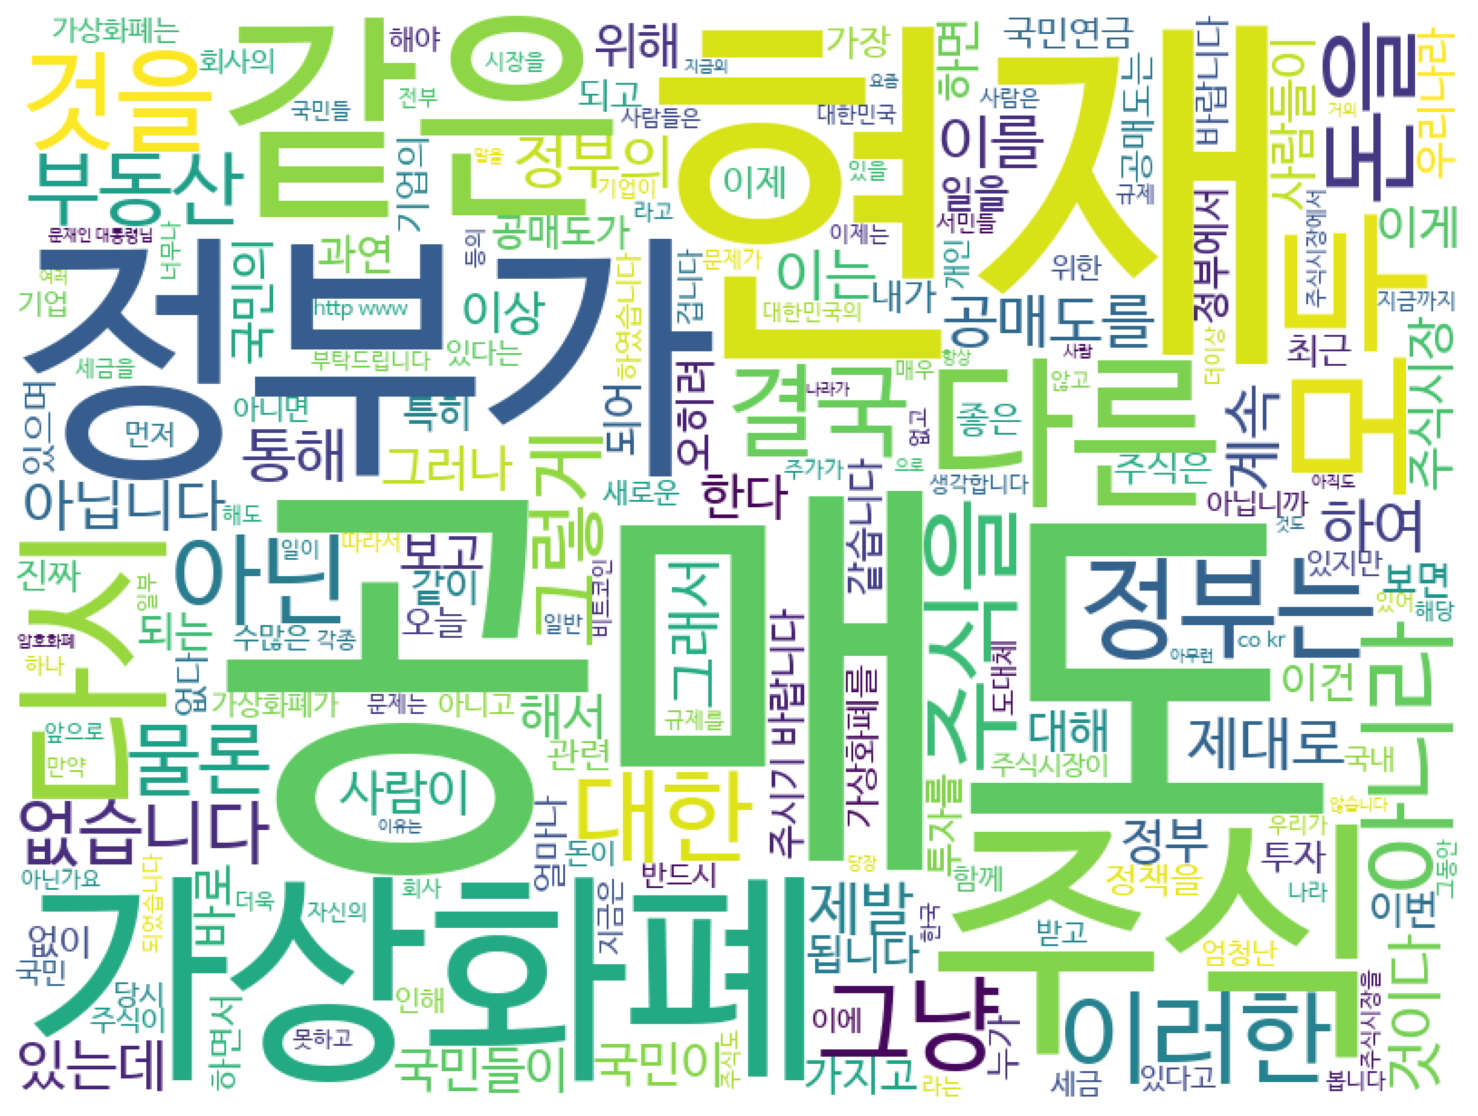

CPU times: user 17.1 s, sys: 521 ms, total: 17.7 s
Wall time: 18.3 s


In [ ]:
%time displayWordCloud(' '.join(sentences))

In [ ]:
from soynlp.noun import LRNounExtractor

In [ ]:
%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (77690, 41112) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 14627 nouns are extracted


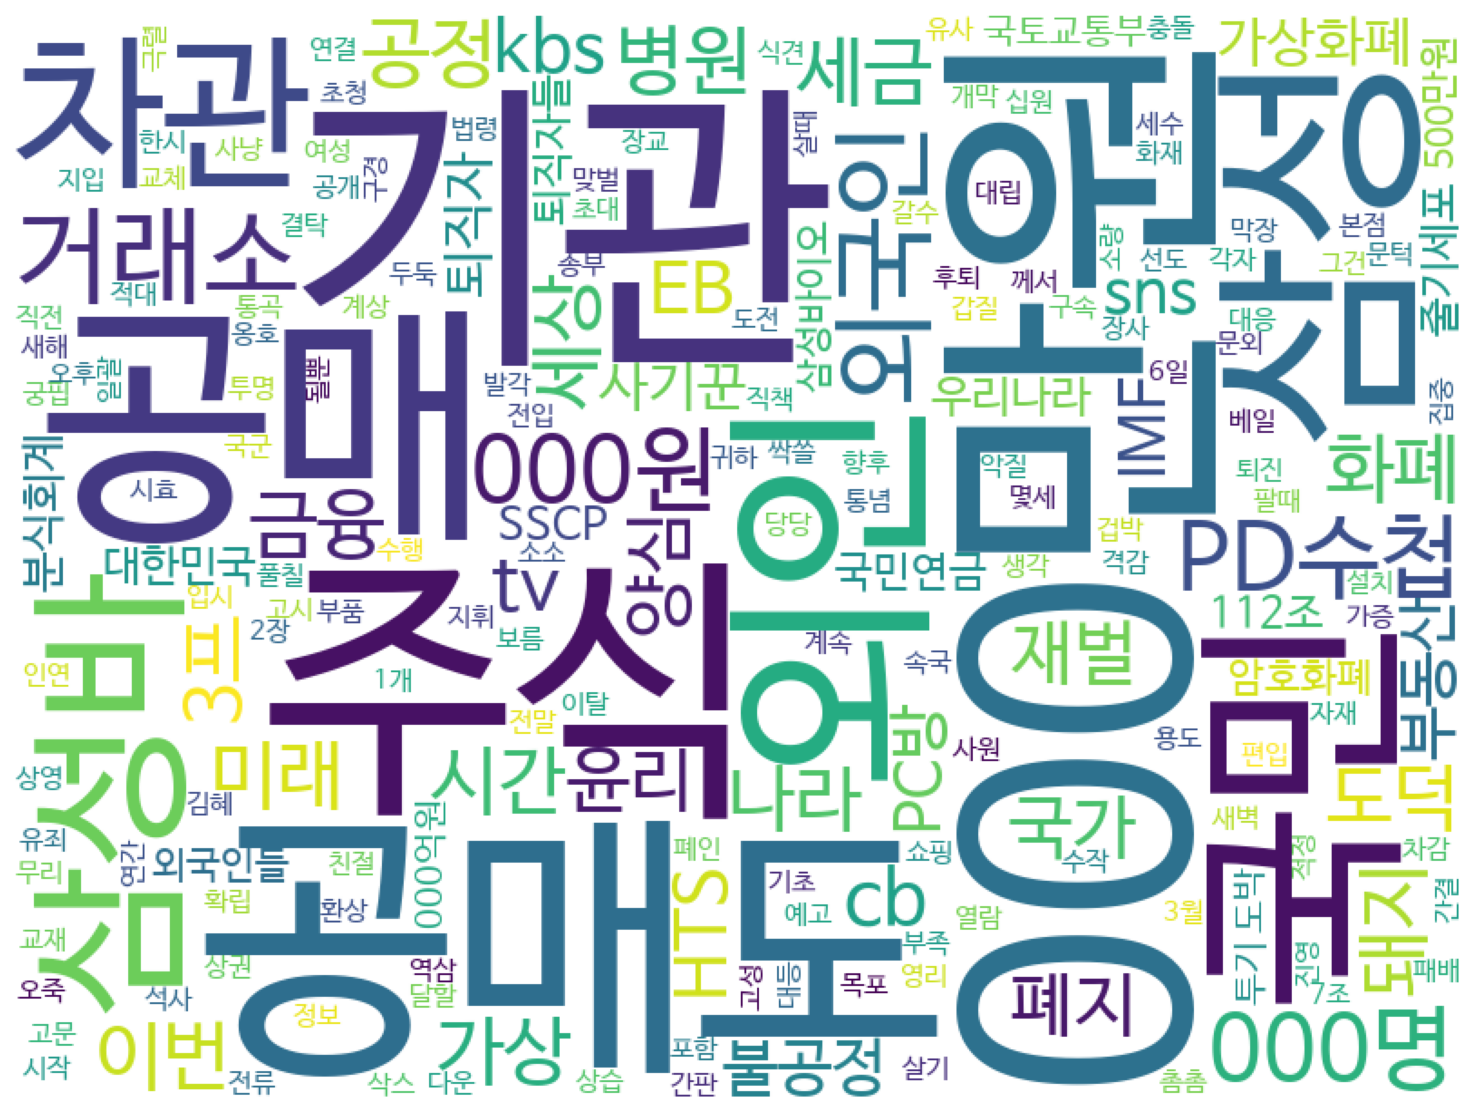

CPU times: user 2.91 s, sys: 198 ms, total: 3.11 s
Wall time: 3.3 s


In [ ]:
%time displayWordCloud(' '.join(nouns))

# word2vec
![](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)

In [ ]:
!pip install gensim
!pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, scipy, six, smart-open
Required-by: 


In [ ]:
# 그래프에서 한글표현을 위해 폰트 설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('petition.csv', index_col=0, parse_dates=['start', 'end'], error_bad_lines=False)
df

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
...,...,...,...,...,...,...,...
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...


In [ ]:
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[ df['title'].str.match(p) | df['content'].str.match(p, flags=re.MULTILINE) ]
finance.shape

(19866, 7)

In [ ]:
finance.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [ ]:
finance.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
491848,2019-01-09,2019-02-08,0,5,기타,은행 업무시간 연장 및 추가 인원 고용,은행 업무 시간을 오후 9시까지 연장해 직장인들도 편리하게 이용할 수 있도록 제안합...
491885,2019-01-09,2019-02-08,0,5,정치개혁,국민연금폐지 하지않으면삶이피폐해진다,35년이 지나면 월급의 30%정도를. 국민연금보험료로 내야합니다.\n계산해보세요\n...
491918,2019-01-09,2019-02-08,0,23,경제민주화,문정부 공매도폐지하라,개미들 돈털어가는 역적 문재인 공매도세력\n모두들 한국 증시 살리기위해 공매도 폐지...
491935,2019-01-09,2019-02-08,0,11,육아/교육,베트남 유학생들에게 10개월째 학비를 돌려주지 않는 서울 ‘**대학’,안녕하세요. 여기는 베트남의 수도 하노이입니다. 최근의 이곳 상황은 베트남 축구대표...
491998,2019-01-09,2019-02-08,0,1,기타,진실은 뉴스가 아니라 마음과 행동입니다,부동산\n새해 복 많이 받으세요\n정말 고생 하시고 수고 많으세요\n전 부동산 개발...


In [ ]:
finance.sort_values(by=['votes'], ascending=False).head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
201953,2018-04-16,2018-05-16,0,260624,정치개혁,선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.,이미 청와대가 선관위에 질의사항으로 접수한\n김기식 금융감독원장의 정치자금법 위반 ...
187633,2018-04-06,2018-05-06,0,242286,경제민주화,삼성증권 시스템 규제와 공매도 금지,우리사주 280만주에 배당 주당 1000원 하기로 하고 현금배당 28억원이 나가야될...
76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...
193553,2018-04-10,2018-05-10,0,110641,경제민주화,김기식 금감원장님을 무슨일이 있어도 지켜주세요!!,최근에 터진 삼성증권 사태 및 금융적폐를 뿌리뽑을 수 있는 유일한 분입니다.\n하지...
394401,2018-10-01,2018-10-31,0,102846,경제민주화,국민연금의 주식대차를 폐지하라,국민연금의 주식대여는 조속히 금지되어야 합니다!\n새 정부의 국정운영이 벌써 2년을...


In [ ]:
sample_index = 201953

In [ ]:
sample_title = finance['title'][sample_index]
sample_title

'선관위의 위법사항 내용에 따른 국회의원 전원 위법사실 여부 전수조사를 청원합니다.'

In [ ]:
sample_content = finance['content'][sample_index]
sample_content

'이미 청와대가 선관위에 질의사항으로 접수한\\n김기식 금융감독원장의 정치자금법 위반 (외유성 해외출장, 정치자금법 위반 등) 에 관련된\\n총 4가지 논란의 적법성 여부를 따지도록 했습니다.\\n금일 (2018년 4월 16일) 선관위는 해당 내용에 대해 위법이라는 판단을 내렸습니다.\\n이에 국민의 한사람으로, 정치자금법 위반행위를 저지른 것으로 확인되는 전/현직 국회의원 전체에 대한\\n위법성 관련 전수조사를 청원하는 바입니다.\\n그리고 위법으로 판단이 내려지는 국회의원 전원에 대한 형사 처벌 및\\n위법적으로 사용된 세금환수를 요청하는 바입니다.'

In [ ]:
#개행문자 제거
# 한글, 영문, 숫자만 남기고 모두 제거
def preprocessing(text):
    text = re.sub('\\\\n', ' ', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [ ]:
sample_content = preprocessing(sample_content)
sample_content[:30]

'이미 청와대가 선관위에 질의사항으로 접수한 김기식 금융'

In [ ]:
%time content_all = finance['content'].apply(preprocessing)

CPU times: user 1.6 s, sys: 13.7 ms, total: 1.62 s
Wall time: 1.64 s


1. 정규화 normalization

        가잨ㅋ -> 가자 ㅋㅋ

2. 토큰화 tokenization

        한국어를 처리하는 예시입니다 ㅋㅋ 
        -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 
        예시Noun, 입Adjective, 니다Eomi, ㅋㅋKoreanParticle

3. 어근화 stemming

        한국어를 처리하는 예시입니다 ㅋㅋ 
        -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 
        예시Noun, 이다Adjective, ㅋㅋKoreanParticle

4. 어구 추출 phrase extraction 

        한국어를 처리하는 예시입니다 ㅋㅋ 
        -> 한국어, 처리, 예시, 처리하는 예시

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['선관위의',
 '위법사항',
 '내용에',
 '따른',
 '국회의원',
 '전원',
 '위법사실',
 '여부',
 '전수조사를',
 '청원합니다',
 '.']

In [ ]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['이미', '청와대가', '선관위에', '질의사항으로', '접수한', '김기식', '금융감독원장의', '정치자금법', '위반', '외유성']

In [ ]:
print(len(tokened_title))
print(len(tokened_content))

11
67


In [ ]:
%time tokens = content_all.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 29.4 s, sys: 291 ms, total: 29.6 s
Wall time: 29.9 s


article_id
28    [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
32    [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
77    [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
Name: content, dtype: object

In [ ]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(tokens, min_count=1)
model

2021-02-06 02:34:01,439 : INFO : 'pattern' package not found; tag filters are not available for English
2021-02-06 02:34:01,454 : INFO : collecting all words and their counts
2021-02-06 02:34:01,455 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-02-06 02:34:02,622 : INFO : PROGRESS: at sentence #10000, processed 2204292 words, keeping 321082 word types
2021-02-06 02:34:03,927 : INFO : collected 578625 word types from a corpus of 4574205 raw words and 19866 sentences
2021-02-06 02:34:03,928 : INFO : Loading a fresh vocabulary
2021-02-06 02:34:06,941 : INFO : effective_min_count=1 retains 578625 unique words (100% of original 578625, drops 0)
2021-02-06 02:34:06,942 : INFO : effective_min_count=1 leaves 4574205 word corpus (100% of original 4574205, drops 0)
2021-02-06 02:34:09,825 : INFO : deleting the raw counts dictionary of 578625 items
2021-02-06 02:34:09,841 : INFO : sample=0.001 downsamples 7 most-common words
2021-02-06 02:34:09,843 : INFO : downs

In [ ]:
model_name = 'w2v'
model.save(model_name)

2021-02-06 02:38:42,988 : INFO : saving Word2Vec object under w2v, separately None
2021-02-06 02:38:42,990 : INFO : storing np array 'vectors' to w2v.wv.vectors.npy
2021-02-06 02:38:43,306 : INFO : not storing attribute vectors_norm
2021-02-06 02:38:43,311 : INFO : storing np array 'syn1neg' to w2v.trainables.syn1neg.npy
2021-02-06 02:38:44,121 : INFO : not storing attribute cum_table
2021-02-06 02:38:46,563 : INFO : saved w2v


In [ ]:
len(model.wv.vocab)

578625

In [ ]:
#자주 나오는 단어지만 불용어에 가까움
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:20]

['수',
 '있습니다',
 '있는',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '더',
 '하고',
 '대한',
 '및',
 '할',
 '월',
 '제',
 '그리고',
 '한',
 '등',
 '없는',
 '저는']

In [ ]:
min(vocab, key=vocab.get)

'원양자원은'

In [ ]:
#자주 나오는 단어지만 불용어에 가까움
from collections import Counter

dict(Counter(vocab).most_common(20))

{'그': <gensim.models.keyedvectors.Vocab at 0x7f68c32385c0>,
 '그리고': <gensim.models.keyedvectors.Vocab at 0x7f68c3207c18>,
 '년': <gensim.models.keyedvectors.Vocab at 0x7f68c3242e80>,
 '대한': <gensim.models.keyedvectors.Vocab at 0x7f68c3238518>,
 '더': <gensim.models.keyedvectors.Vocab at 0x7f68c3249550>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7f68c3252320>,
 '및': <gensim.models.keyedvectors.Vocab at 0x7f68c3224e80>,
 '수': <gensim.models.keyedvectors.Vocab at 0x7f68c323cb38>,
 '없는': <gensim.models.keyedvectors.Vocab at 0x7f68c3244e80>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7f68c32407f0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7f68c3240668>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x7f68c323cf98>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x7f68c3224470>,
 '저는': <gensim.models.keyedvectors.Vocab at 0x7f69173dff28>,
 '제': <gensim.models.keyedvectors.Vocab at 0x7f68c3254e10>,
 '하고': <gensim.models.keyedvectors.Vocab at 0x7f68c323dba8>,
 '하는': <gensim.models.keyedvec

In [ ]:
model.wv['주식']

array([ 0.4083061 ,  2.9706235 , -3.1340094 ,  0.27743083, -1.8113508 ,
        0.5058121 , -0.7168709 , -0.7254117 ,  0.9043636 , -0.685716  ,
       -1.6865939 ,  0.91514343, -1.1895204 , -0.37538293,  0.4217163 ,
       -0.9625272 ,  1.0598718 ,  2.8044822 ,  0.171331  , -0.04946832,
       -1.1630319 ,  0.11858068, -1.7936935 , -2.5109973 , -0.31402487,
        0.60861534, -0.9922708 , -1.4456285 ,  0.2825344 ,  1.4896607 ,
        1.7093596 ,  1.6963049 ,  1.5718553 ,  1.1548542 , -0.4426952 ,
       -0.660244  ,  2.479735  ,  0.15162392,  1.6037829 ,  0.06752896,
        2.876058  ,  2.7702966 , -1.3118263 ,  1.2581375 , -1.5686011 ,
        1.2116417 ,  1.6030241 ,  0.0945971 ,  0.05855815,  0.9878486 ,
       -4.5884705 ,  2.1704009 , -0.4563404 ,  1.4878674 , -2.4987648 ,
        1.6019442 , -1.5919969 , -1.3624642 ,  4.7938275 ,  1.4280889 ,
        0.01283163, -0.52265745, -0.15651123, -0.14160863,  0.39109093,
        0.74802977,  1.1526451 , -0.8322932 , -2.331536  , -1.27

In [ ]:
model.wv.most_similar('주식')

2021-02-06 02:49:29,752 : INFO : precomputing L2-norms of word weight vectors


[('투자', 0.8837594985961914),
 ('투전판', 0.8656424283981323),
 ('코스닥', 0.8594889044761658),
 ('국내야구', 0.8566956520080566),
 ('외국인', 0.8547812700271606),
 ('외국인만', 0.8512887954711914),
 ('대여는', 0.8479570150375366),
 ('기관', 0.8397914171218872),
 ('막기전에', 0.833806037902832),
 ('장난감의', 0.830449640750885)]

In [ ]:
model.wv.most_similar('코스닥')

[('주식시장', 0.9085250496864319),
 ('코스피', 0.90335613489151),
 ('한국국민들의', 0.9002307653427124),
 ('폭락', 0.8751630783081055),
 ('고용률', 0.8630679845809937),
 ('증시', 0.8629778623580933),
 ('주식', 0.8594889044761658),
 ('가상화폐', 0.8583253622055054),
 ('연일', 0.858222484588623),
 ('바이오', 0.8531235456466675)]

In [ ]:
model.wv.most_similar('공매도')

[('공매도를', 0.8644672632217407),
 ('공매수', 0.8636367321014404),
 ('끈끈했을까요', 0.8614875674247742),
 ('국민착취제도인', 0.859965980052948),
 ('한번확인햐보세요', 0.8496094942092896),
 ('선진국중', 0.8439764976501465),
 ('과열종목', 0.8423916101455688),
 ('기관매매자들이', 0.8295078277587891),
 ('개미투자', 0.8288315534591675),
 ('벌어지는지', 0.8230336308479309)]

In [ ]:
model.wv.most_similar('개미')

[('투자자들', 0.9461631178855896),
 ('개인투자자', 0.9444249868392944),
 ('투자자들만', 0.9338831901550293),
 ('피빨아먹는', 0.9291768074035645),
 ('피빨아', 0.9269363880157471),
 ('뺏어가는', 0.9243178963661194),
 ('개미를', 0.9220930337905884),
 ('개인들', 0.9204452633857727),
 ('기관들과', 0.9194754362106323),
 ('놀이터로', 0.9167181253433228)]

In [ ]:
model.wv.doesnt_match('공매도 개미 투자자들 주식 민정'.split())

'민정'

In [ ]:
model.wv.most_similar('민정')

[('님', 0.9378703236579895),
 ('인사의', 0.9377400279045105),
 ('금융감독원장', 0.9376927614212036),
 ('개인정보처리방침저작권', 0.9352414011955261),
 ('민정수석', 0.9345638751983643),
 ('특사', 0.9331698417663574),
 ('김진모', 0.9326307773590088),
 ('명단', 0.9324836730957031),
 ('산하', 0.9305061101913452),
 ('대통령비서실', 0.9301441311836243)]

In [ ]:
model.wv.most_similar(positive=['코스닥', '주식시장'], negative=['개미'])

[('활성화', 0.8443477153778076),
 ('한국국민들의', 0.8124697208404541),
 ('가상화폐', 0.8072443008422852),
 ('주식거래소부터', 0.8016781806945801),
 ('밀었던', 0.7916613817214966),
 ('이익보는', 0.7891421318054199),
 ('막기전에', 0.7890194654464722),
 ('끝날것이다', 0.7874372005462646),
 ('이늠에', 0.7872599363327026),
 ('코스피', 0.7871391773223877)]

In [ ]:
model.wv.similarity('공매도', '주식')

0.7917233

In [ ]:
model.wv.similarity('개미', '투자자들')

0.94616306

In [ ]:
#시각화
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

mpl.rcParams['axes.unicode_minus'] = False #그래프에서 폰트 깨지는 문제 방지

model_name = 'w2v'
model = g.Doc2Vec.load(model_name)

2021-02-06 03:27:17,580 : INFO : loading Doc2Vec object from w2v
2021-02-06 03:27:19,901 : INFO : loading wv recursively from w2v.wv.* with mmap=None
2021-02-06 03:27:19,902 : INFO : loading vectors from w2v.wv.vectors.npy with mmap=None
2021-02-06 03:27:19,973 : INFO : setting ignored attribute vectors_norm to None
2021-02-06 03:27:19,974 : INFO : loading vocabulary recursively from w2v.vocabulary.* with mmap=None
2021-02-06 03:27:19,976 : INFO : loading trainables recursively from w2v.trainables.* with mmap=None
2021-02-06 03:27:19,977 : INFO : loading syn1neg from w2v.trainables.syn1neg.npy with mmap=None
2021-02-06 03:27:20,047 : INFO : setting ignored attribute cum_table to None
2021-02-06 03:27:20,048 : INFO : loaded w2v


In [ ]:
vocab = list(model.wv.vocab)
X = model[vocab]

print( 'vocab 수 {}'.format(len(X)) )
X[0][:10]

vocab 수 578625


array([ 0.1154125 , -0.01329413,  0.18819052, -0.00622867, -0.13911399,
        0.24840657,  0.01901523, -0.06162162, -0.18802261,  0.12539113],
      dtype=float32)

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:150,:]) #일부 단어만 시각화

df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [ ]:
df.head()

,x,y
존경하옵는,1.140967,3.693219
문재인대통령님께,0.858488,3.628972
저는,-5.641702,-3.518953
중국원양자원이라는,-0.001761,6.725025
KOSPI,-0.723042,2.063487


In [ ]:
# 그래프에서 한글표현을 위해 폰트 설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

2021-02-06 03:27:33,521 : INFO : generated new fontManager


In [ ]:
fig = plt.figure()
fig.set_size_inches(50, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

# 모델을 위한 데이터 전처리

In [ ]:
petitions = pd.read_csv('petition.csv', index_col=0, parse_dates=['start', 'end'], error_bad_lines=False)

In [ ]:
petitions.describe()

,answered,votes
count,377756.000000,3.777560e+05
mean,0.000077,1.514069e+02
std,0.008761,4.842551e+03
min,0.000000,0.000000e+00
25%,0.000000,1.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


In [ ]:
petitions['votes'].max()

1192049

In [ ]:
petitions['votes'].min()

0

In [ ]:
petitions['votes'].mean()

151.40693463505542

In [ ]:
petitions['votes'].median()

5.0

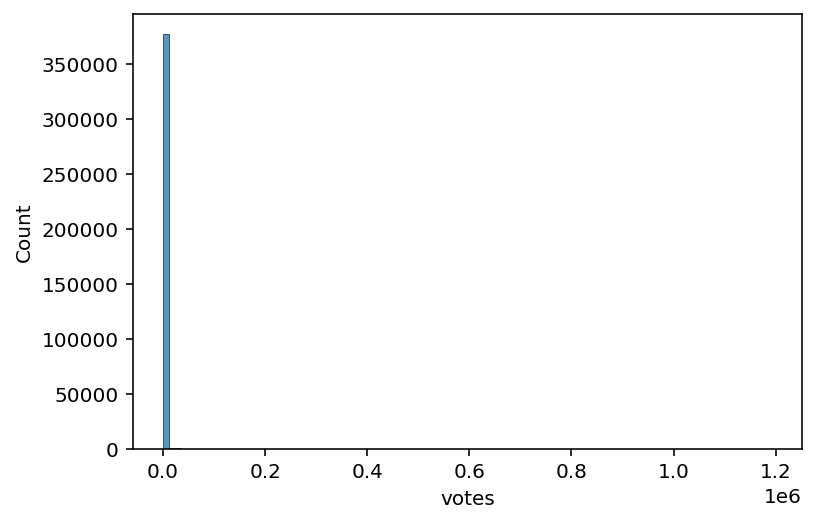

In [ ]:
sns.histplot(x='votes', data=petitions, bins=100)

In [ ]:
petition_remove_outlier = petitions.loc[(petitions['votes'] >= 1000) & 
                                        (petitions['votes'] <= 300000)]
petition_remove_outlier.shape

(3327, 7)

In [ ]:
df = petition_remove_outlier.copy()

In [ ]:
df.describe()

,answered,votes
count,3327.000000,3327.000000
mean,0.006913,12399.495942
std,0.082870,34000.937940
min,0.000000,1000.000000
25%,0.000000,1564.000000
50%,0.000000,2745.000000
75%,0.000000,7205.500000
max,1.000000,296330.000000


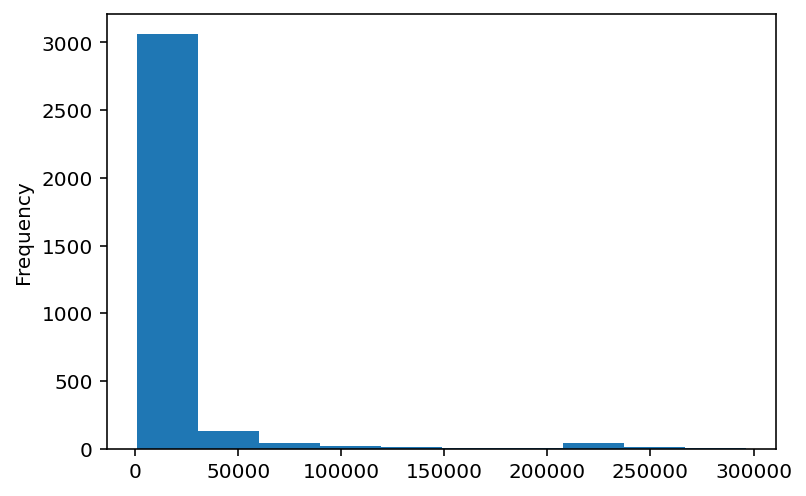

In [ ]:
%matplotlib inline 
df['votes'].plot.hist()

In [ ]:
#모수가 적어 분류 데이터로 적합하지 않음
df.loc[df['answered'] == 1].shape

(23, 7)

## 투표수를 평균보다 높게 혹은 적게 받는지로 분류하기(이진분류)

In [ ]:
votes_mean = df['votes'].mean()
votes_mean

12399.495942290352

In [ ]:
df['votes_pos_neg'] = 0

In [ ]:
df['votes_pos_neg'] = (df['votes'] > votes_mean) == 1

In [ ]:
df['votes_pos_neg'].dtypes

dtype('bool')

In [ ]:
df['votes_pos_neg'] = df['votes_pos_neg'].astype(int)

In [ ]:
df[['votes', 'votes_pos_neg']].head()

,votes,votes_pos_neg
article_id,,
28,2137,0
43,11293,0
46,1933,0
50,1251,0
61,1185,0


In [ ]:
df['votes_pos_neg'].value_counts()

0    2765
1     562
Name: votes_pos_neg, dtype: int64

## 텍스트 데이터 전처리

In [ ]:
sample_index = 43

In [ ]:
sample_title = df.loc[sample_index, 'title']
sample_title

'기간제 교사의 정규직화를 반대합니다.'

In [ ]:
sample_content = petitions.loc[sample_index, 'content']
sample_content

'대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된다고 했을 때, 공채 채용과정이 있는데, 설마 그러겠어라고 생각하고 있었습니다. 그리고 기간제는 그 채용과정이 공개채용에 비해 불투명하고, 아이들을 가르칠 수 있는 전문성이 떨어지는데, 어떻게 된다는 거지? 그런 생각이라 사실 그냥 뜬 소문이라고 생각했습니다.\\n수년간 임용을 준비하는 수험생으로서, 여러 기회비용을 포기하고, 오로지 교단에서 서서 아이들에게 내가 알고 있는 지식을 제대로 가르치겠다는 신념으로 공부해왔습니다. 그런데 오늘 보니 기간제가 정규직화되는 것이 거의 확정적으로 되는 것같아, 사실 너무 상대적 허탈감을 느낍니다. 기간제 선생님들은 임용고시를 일단 보류해두고 현장에 나아간 것이고, 임용 준비생은 일단 임용고시 합격을 목표로 그 한해 기회비용까지 써가면서 공부하는 것이니까요. 그래서 전문적인 지식을 더 갖추고 있는 임용수험생들이 현장에 일하지 않았다는 이유로 기간제 교사에게 기회까지 박탈당하면서 자리를 내주어야 하나 의구심이 듭니다. 존경하는 대통령님 기간제 정규직화 다시 한번 생각해주시기 바랍니다. 양질의 아이들에게 교육을 제공하기 위해서라도, 기간제 정규직화는 안됩니다. 똑같은 기회의 평등을 제공해주십시오. 전문적인 지식을 갖추고 열심히 노력한 임고생이 단지 현장을 경험하지 않았다는 이유만으로 역차별을 당하는 일은 없어야 합니다. 미래의 아이들을 가르칠 인력, 다시 한번 심사숙고해주시길 바랍니다. 나라를 이끌어갈 인재를 양성하는 곳입니다.\\n제발, 다시한번 시사숙고 해주시길 바랍니다.\\n그리고 사대와 교대를 폐지하고 로스쿨화시킨다고 글을 카페에서 읽었습니다. 제발 사실이 아니길 기도합니다. 현대판 음서제를 시행하는 것이라고 비판하더라군요. 또한 교육개혁에 교사의 지방직화라는 글을 들었습니다. 처음에는 그냥 설마겠거니 했습니다. 그런데 점차그렇게 흘러가는 것 같더군요. 나라의 재정이 어려워, 공무원 연금을 삭감하기 위해 기간제를 무기계약직으로 채용하는 

In [ ]:
def preprocessing(text):
    text = re.sub('\\\\n', ' ', text) #개행문자 제거
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text) #한글과 영문만 남기고 모두 제거
    text = re.sub(' +', ' ', text) #중복된 공백 제거
    return text

#(참고)특수문자 제거 text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)

In [ ]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', 
             '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', 
             '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', 
             '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [ ]:
%time pre_sample_content = preprocessing(sample_content)

CPU times: user 2.36 ms, sys: 0 ns, total: 2.36 ms
Wall time: 2.36 ms


In [ ]:
%time pre_sample_content = remove_stopwords(pre_sample_content)

CPU times: user 213 µs, sys: 6 µs, total: 219 µs
Wall time: 224 µs


In [ ]:
pre_sample_content

'대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 때 공채 채용과정이 있는데 설마 그러겠어라고 생각하고 있었습니다 기간제는 채용과정이 공개채용에 비해 불투명하고 아이들을 가르칠 전문성이 떨어지는데 어떻게 된다는 거지 그런 생각이라 사실 그냥 뜬 소문이라고 생각했습니다 수년간 임용을 준비하는 수험생으로서 여러 기회비용을 포기하고 오로지 교단에서 서서 아이들에게 내가 알고 지식을 제대로 가르치겠다는 신념으로 공부해왔습니다 그런데 오늘 보니 기간제가 정규직화되는 것이 거의 확정적으로 되는 것같아 사실 너무 상대적 허탈감을 느낍니다 기간제 선생님들은 임용고시를 일단 보류해두고 현장에 나아간 것이고 임용 준비생은 일단 임용고시 합격을 목표로 한해 기회비용까지 써가면서 공부하는 것이니까요 그래서 전문적인 지식을 갖추고 임용수험생들이 현장에 일하지 않았다는 이유로 기간제 교사에게 기회까지 박탈당하면서 자리를 내주어야 하나 의구심이 듭니다 존경하는 대통령님 기간제 정규직화 다시 한번 생각해주시기 바랍니다 양질의 아이들에게 교육을 제공하기 위해서라도 기간제 정규직화는 안됩니다 똑같은 기회의 평등을 제공해주십시오 전문적인 지식을 갖추고 열심히 노력한 임고생이 단지 현장을 경험하지 않았다는 이유만으로 역차별을 당하는 일은 없어야 미래의 아이들을 가르칠 인력 다시 한번 심사숙고해주시길 바랍니다 나라를 이끌어갈 인재를 양성하는 곳입니다 제발 다시한번 시사숙고 해주시길 바랍니다 사대와 교대를 폐지하고 로스쿨화시킨다고 글을 카페에서 읽었습니다 제발 사실이 아니길 기도합니다 현대판 음서제를 시행하는 것이라고 비판하더라군요 또한 교육개혁에 교사의 지방직화라는 글을 들었습니다 처음에는 그냥 설마겠거니 했습니다 그런데 점차그렇게 흘러가는 것 같더군요 나라의 재정이 어려워 공무원 연금을 삭감하기 기간제를 무기계약직으로 채용하는 것이라면 그게 시작이라면 어쩔 없다고 생각합니다 하지만 의원님 교육의 질을 먼저 생각해주세요 기간제와 임용고시 준비생은 처음부터 선택이 

In [ ]:
%time df['content_all'] = df['content'].apply(preprocessing)

CPU times: user 569 ms, sys: 4.9 ms, total: 574 ms
Wall time: 585 ms


In [ ]:
%time df['content_all'] = df['content_all'].apply(remove_stopwords)

CPU times: user 440 ms, sys: 684 µs, total: 441 ms
Wall time: 447 ms


In [ ]:
df

,start,end,answered,votes,category,title,content,votes_pos_neg,content_all
article_id,,,,,,,,,
28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0,존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니다 중...
43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 ...
46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 ...
50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다 다름...
61,2017-08-19,2017-08-26,0,1185,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...,0,영전강의고용안정을 원합니다 년단위계약직으로 임신 출산육아 매우 곤란합니다 성과급 ...
...,...,...,...,...,...,...,...,...,...
490815,2019-01-08,2019-02-07,0,1931,안전/환경,충북제천시 주민들의동의없는 폐기물처리장을 막아주세요!!,제천의\n주민 아파트 밀집단지 인근(약1.2km거리)에\n시멘트 폐기물 가공업체가 ...,0,제천의 주민 아파트 밀집단지 인근 약 km거리 에 시멘트 폐기물 가공업체가 들어온다...
491101,2019-01-09,2019-02-08,0,3010,문화/예술/체육/언론,심석희 사건 책임자 이기흥 대한체육회장의 파면을 촉구합니다.,심석희 선수에 대한 조재범 코치의 (성)폭행 사건으로 온 국민이 분노하고 있습니다....,0,심석희 선수에 조재범 코치의 성 폭행 사건으로 온 국민이 분노하고 이 사건의 책임은...
491286,2019-01-09,2019-02-08,0,10248,육아/교육,학교폭력가해기록을 학생부에 기록하게 해야합니다,얼마전 교육자치정책협의회에서 학교폭력 가해자의 기록을 학생부에 기재하지 않도록 협의...,0,얼마전 교육자치정책협의회에서 학교폭력 가해자의 기록을 학생부에 기재하지 않도록 협의...


# train과 test 구분 (7:3)

In [ ]:
df = df.reset_index()
df.head()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_all
0,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,0,존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니다 중...
1,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 ...
2,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",0,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 했을 ...
3,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,0,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다 다름...
4,61,2017-08-19,2017-08-26,0,1185,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...,0,영전강의고용안정을 원합니다 년단위계약직으로 임신 출산육아 매우 곤란합니다 성과급 ...


In [ ]:
df.shape

(3327, 10)

In [ ]:
split_count = int(df.shape[0] * 0.7)
split_count

2328

In [ ]:
df_train = df[:split_count].copy()
df_train.shape

(2328, 10)

In [ ]:
df_train.tail()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_all
2323,343870,2018-08-16,2018-09-15,0,1371,정치개혁,시민단체수준인 여가부 폐지를 청원합니다,http://www.edaily.co.kr/news/news_detail.asp?n...,0,http www edaily co kr news news detail asp new...
2324,344281,2018-08-16,2018-09-15,0,2680,육아/교육,경기도 시흥시 모고등학교 갑질 교감에 대한 중징계를 청원합니다.,대기업 오너 일가들의 ‘갑질’ 문제가 사회적으로 크게 이슈가 되고 있습니다.\n그러...,0,대기업 오너 일가들의 갑질 문제가 사회적으로 크게 이슈가 되고 그러나 비단 대기업 ...
2325,344298,2018-08-17,2018-09-16,0,1861,행정,대통령님 보험사들 횡포에 암환자들이 죽어갑니다. 보험사들 횡포에 철퇴를 내려주세요.,대통령님 보험사들 횡포에 암환자들이 죽어갑니다. 보험사들 횡포에 철퇴를 내려주세요....,0,대통령님 보험사들 횡포에 암환자들이 죽어갑니다 보험사들 횡포에 철퇴를 내려주세요 이...
2326,344299,2018-08-17,2018-09-16,0,22786,외교/통일/국방,"""성상품화""로 가득찬 군대위문공연을 폐지해주세요","군대에서 군인들의 사기를 올리기 위해 행해진다고 주장하는 ""성적대상화"" 위문공연을 ...",1,군대에서 군인들의 사기를 올리기 행해진다고 주장하는 성적대상화 위문공연을 폐지해주시...
2327,344500,2018-08-17,2018-09-16,0,25749,기타,"540마리 사육곰 문제, 정부에 적극적인 대책 마련을 요구합니다.","최근 언론 보도를 타면서, 사육곰 문제가 국민의 공분을 일으키고 있습니다. 책임자들...",1,최근 언론 보도를 타면서 사육곰 문제가 국민의 공분을 일으키고 책임자들이 서로 책임...


In [ ]:
df_train.loc[df_train['votes_pos_neg'] == 1].shape

(401, 10)

In [ ]:
df_test = df[split_count:].copy()
df_test.shape

(999, 10)

In [ ]:
df_test.loc[df_test['votes_pos_neg'] == 1].shape

(161, 10)

# 단어 벡터화

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, #하나의 문서에 그 토큰이 최소 2개는 나와야 한다는 의미 / 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋음 
                             ngram_range=(1, 3), #Bag Of Words 보완 / 토큰 1개부터 3개까지
                             max_features = 2000 
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
%time 
train_feature_vector = vectorizer.fit_transform(df_train['content_all'])
train_feature_vector.shape

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


(2328, 2000)

In [ ]:
%time 
test_feature_vector = vectorizer.fit_transform(df_test['content_all'])
test_feature_vector.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


(999, 2000)

In [ ]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:5]

2000


['aid', 'and', 'article', 'articleview', 'articleview html']

In [ ]:
dist = np.sum(train_feature_vector, axis=0)
pd.DataFrame(dist, columns=vocab)

,aid,and,article,articleview,articleview html,articleview html idxno,asp,a는,a의,cctv,cctv를,cj,cj의,co,co kr,co kr news,com,com main,com main read,com news,go,go kr,gtx,html,html idxno,http,http news,http news naver,http www,https,https news,https news naver,https www,idxno,in,km,kr,kr news,lsd,lsd mid,...,형사,혜택을,호선,호소합니다,혹시,혹은,혼자,화가,화를,화재,확대,확실한,확인,환경에서,환자,환자가,환자는,환자를,환자의,활동을,회사,회사가,회사는,회사를,회사에,회사에서,회사의,회장이,효과가,후에,훨씬,희망을,힘든,힘들게,힘들고,힘들어,힘듭니다,힘없는,힘을,힘이
0,89,86,62,83,66,66,38,36,186,179,84,359,77,74,40,38,147,66,581,148,84,243,134,41,50,93,53,40,39,248,88,75,70,63,82,74,74,81,72,52,...,95,40,75,36,39,36,89,50,192,37,86,46,65,38,45,55,66,68,57,67,60,40,38,69,45,39,36,67,39,44,50,77,62,146,87,38,44,39,96,64


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [ ]:
%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


(2328, 2000)

In [ ]:
%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs


(999, 2000)

In [ ]:
x_train = train_feature_tfidf

In [ ]:
x_test = test_feature_tfidf

# 랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=42)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train = df_train['votes_pos_neg']
%time forest = forest.fit(x_train, y_train)

CPU times: user 5.16 s, sys: 60.8 ms, total: 5.22 s
Wall time: 3.11 s


# 평가

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
score = cross_val_score(forest, x_train, y_train, 
                        cv=k_fold, n_jobs=-1, 
                        scoring=scoring)
score

array([0.82403433, 0.84549356, 0.83905579, 0.8172043 , 0.80215054])

In [ ]:
round(np.mean(score)*100,2)

82.56

# 예측

In [ ]:
y_pred = forest.predict(x_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred.shape

(999,)

In [ ]:
pred = pd.DataFrame(data={'votes_pos_neg_pred':y_pred})
pred.head()

,votes_pos_neg_pred
0,0
1,0
2,0
3,0
4,0


In [ ]:
pred['votes_pos_neg_pred'].value_counts()

0    994
1      5
Name: votes_pos_neg_pred, dtype: int64

In [ ]:
df_test['votes_pos_neg_pred'] = y_pred

In [ ]:
df_test

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_all,votes_pos_neg_pred
2328,344518,2018-08-17,2018-09-16,0,1366,행정,동탄구청 설립 행정안전부에 승인요청,화성시 인구는 2018년 6월 기준 71만 5천626명입니다. 동탄 2신도시 입주로...,0,화성시 인구는 년 기준 만 천 명입니다 동탄 신도시 입주로 계속적인 인구증가가 예상...,0
2329,344522,2018-08-17,2018-09-16,0,15031,반려동물,강릉 고양이 토막사건,강릉 원주대에 새끼고양이 얼굴만남은채 캠퍼스안에 놓여진 사건이있습니다.\n같은 동물...,1,강릉 원주대에 새끼고양이 얼굴만남은채 캠퍼스안에 놓여진 사건이있습니다 동물들을 키우...,0
2330,344741,2018-08-17,2018-09-16,0,2731,안전/환경,낙동강 보를 열어주세요,저는 경남 창원에서 낙동강 물로 두 아이를 키우고 있는 엄마 입니다.\n낙동강 수질...,0,경남 창원에서 낙동강 물로 두 아이를 키우고 엄마 낙동강 수질이 등급이라는 kbs뉴...,0
2331,344877,2018-08-17,2018-09-16,0,1629,행정,부동산 정책의 실패 애꿎은 중개업소에 전가말라.,부동산 정책의 실패 애꿎은 중개업소에 전가말라.\n의사 덕에 질병이 느는가?\n변호...,0,부동산 정책의 실패 애꿎은 중개업소에 전가말라 의사 덕에 질병이 느는가 변호사 덕에...,0
2332,345337,2018-08-17,2018-09-16,0,1285,성장동력,문대통령님 공약중에 하나인 계양테크노밸리 추진을 부탁드립니다,문대통령님 선거 당시 지역개발 공약이자 송영길 의원의 공약이기도 한 계양테크노밸리...,0,문대통령님 선거 당시 지역개발 공약이자 송영길 의원의 공약이기도 계양테크노밸리 조성...,0
...,...,...,...,...,...,...,...,...,...,...,...
3322,490815,2019-01-08,2019-02-07,0,1931,안전/환경,충북제천시 주민들의동의없는 폐기물처리장을 막아주세요!!,제천의\n주민 아파트 밀집단지 인근(약1.2km거리)에\n시멘트 폐기물 가공업체가 ...,0,제천의 주민 아파트 밀집단지 인근 약 km거리 에 시멘트 폐기물 가공업체가 들어온다...,0
3323,491101,2019-01-09,2019-02-08,0,3010,문화/예술/체육/언론,심석희 사건 책임자 이기흥 대한체육회장의 파면을 촉구합니다.,심석희 선수에 대한 조재범 코치의 (성)폭행 사건으로 온 국민이 분노하고 있습니다....,0,심석희 선수에 조재범 코치의 성 폭행 사건으로 온 국민이 분노하고 이 사건의 책임은...,0
3324,491286,2019-01-09,2019-02-08,0,10248,육아/교육,학교폭력가해기록을 학생부에 기록하게 해야합니다,얼마전 교육자치정책협의회에서 학교폭력 가해자의 기록을 학생부에 기재하지 않도록 협의...,0,얼마전 교육자치정책협의회에서 학교폭력 가해자의 기록을 학생부에 기재하지 않도록 협의...,0
3325,491434,2019-01-09,2019-02-08,0,11487,교통/건축/국토,억울하게 세상을 떠난 저의 아버지와 동생을 도와주세요.,저는 9월 2일 중부내륙고속도로에서 부자가 한 번에 목숨을 잃었던 사고의 딸이자 누...,0,중부내륙고속도로에서 부자가 번에 목숨을 잃었던 사고의 딸이자 누나입니다 사랑하던 아...,0


## 예측 결과의 정확도

In [ ]:
df_test['pred_diff'] = np.abs(df_test['votes_pos_neg'] - df_test['votes_pos_neg_pred'])
df_test.head()

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_all,votes_pos_neg_pred,pred_diff
2328,344518,2018-08-17,2018-09-16,0,1366,행정,동탄구청 설립 행정안전부에 승인요청,화성시 인구는 2018년 6월 기준 71만 5천626명입니다. 동탄 2신도시 입주로...,0,화성시 인구는 년 기준 만 천 명입니다 동탄 신도시 입주로 계속적인 인구증가가 예상...,0,0
2329,344522,2018-08-17,2018-09-16,0,15031,반려동물,강릉 고양이 토막사건,강릉 원주대에 새끼고양이 얼굴만남은채 캠퍼스안에 놓여진 사건이있습니다.\n같은 동물...,1,강릉 원주대에 새끼고양이 얼굴만남은채 캠퍼스안에 놓여진 사건이있습니다 동물들을 키우...,0,1
2330,344741,2018-08-17,2018-09-16,0,2731,안전/환경,낙동강 보를 열어주세요,저는 경남 창원에서 낙동강 물로 두 아이를 키우고 있는 엄마 입니다.\n낙동강 수질...,0,경남 창원에서 낙동강 물로 두 아이를 키우고 엄마 낙동강 수질이 등급이라는 kbs뉴...,0,0
2331,344877,2018-08-17,2018-09-16,0,1629,행정,부동산 정책의 실패 애꿎은 중개업소에 전가말라.,부동산 정책의 실패 애꿎은 중개업소에 전가말라.\n의사 덕에 질병이 느는가?\n변호...,0,부동산 정책의 실패 애꿎은 중개업소에 전가말라 의사 덕에 질병이 느는가 변호사 덕에...,0,0
2332,345337,2018-08-17,2018-09-16,0,1285,성장동력,문대통령님 공약중에 하나인 계양테크노밸리 추진을 부탁드립니다,문대통령님 선거 당시 지역개발 공약이자 송영길 의원의 공약이기도 한 계양테크노밸리...,0,문대통령님 선거 당시 지역개발 공약이자 송영길 의원의 공약이기도 계양테크노밸리 조성...,0,0


In [ ]:
pred_diff = df_test['pred_diff'].value_counts()
pred_diff

0    837
1    162
Name: pred_diff, dtype: int64

In [ ]:
acc = ( pred_diff[0] / y_pred.shape[0] ) * 100 
acc

83.78378378378379